In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CSV Files/8_train.csv")

In [3]:
df.tail()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
data = np.array(df)
m, n = data.shape

Y_train = data.T[0]
X_train = data.T[1:]
X_train = X_train / 255

In [5]:
Y_train

array([1, 0, 1, ..., 7, 6, 9])

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X_train.shape

(784, 42000)

In [8]:
def init_params():
    w1 = np.random.randn(16, 784) * 0.01
    b1 = np.zeros((16, 1))
    w2 = np.random.randn(10, 16) * 0.01
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

def one_hot(X):
    num_samples = len(X)
    num_classes = max(X) + 1
    
    one_hot_Y = [[0 for _ in range(num_samples)] for _ in range(num_classes)]
    for sample_index in range(num_samples):
        label = X[sample_index]
        one_hot_Y[label][sample_index] = 1
    return one_hot_Y

def ReLU(X):
    return np.maximum(X, 0)

def softmax(X):
    A = np.exp(X) / sum(np.exp(X))
    return A
    
def ReLU_deriv(X):
    return X > 0

In [9]:
def forward_pass(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def back_prop(z1, a1, z2, a2, w1, w2, X, Y):
    one_hot_Y = one_hot(Y)
    dz2 = a2 - one_hot_Y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * ReLU_deriv(z1)
    dw1 = 1 / m * dz1.dot(X.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    w2 = w2 - alpha * dw2
    b1 = b1 - alpha * db1
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

In [10]:
def get_predictions(x):
    rows = len(x)
    cols = len(x[0])
    res = []

    for col in range(cols):
        max_val = x[0][col]
        max_idx = 0
        for row in range(1, rows):
            if max_val < x[row][col]:
                max_val = x[row][col]
                max_idx = row
        res.append(max_idx)
    return res

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_pass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [11]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
Accuracy:  0.08240476190476191
Iteration:  10
Accuracy:  0.18923809523809523
Iteration:  20
Accuracy:  0.2144047619047619
Iteration:  30
Accuracy:  0.22366666666666668
Iteration:  40
Accuracy:  0.2007142857142857
Iteration:  50
Accuracy:  0.1735
Iteration:  60
Accuracy:  0.18742857142857142
Iteration:  70
Accuracy:  0.25266666666666665
Iteration:  80
Accuracy:  0.40254761904761904
Iteration:  90
Accuracy:  0.530547619047619
Iteration:  100
Accuracy:  0.602547619047619
Iteration:  110
Accuracy:  0.6510476190476191
Iteration:  120
Accuracy:  0.6976666666666667
Iteration:  130
Accuracy:  0.7305238095238096
Iteration:  140
Accuracy:  0.7535238095238095
Iteration:  150
Accuracy:  0.7718809523809523
Iteration:  160
Accuracy:  0.7873095238095238
Iteration:  170
Accuracy:  0.7993333333333333
Iteration:  180
Accuracy:  0.8105952380952381
Iteration:  190
Accuracy:  0.8205238095238095
Iteration:  200
Accuracy:  0.8287380952380953
Iteration:  210
Accuracy:  0.8358809523809524
Iterati

In [13]:
def make_predictions(X, w1, b1, w2, b2):
    _, _, _, a2 = forward_pass(w1, b1, w2, b2, X)
    predictions = get_predictions(a2)
    return predictions

In [14]:
df_test = pd.read_csv("CSV Files/8_test.csv")

In [15]:
df_test = np.array(df_test)

In [21]:
test1 = df_test[0].T / 255
test1 = test1.reshape(test1.size, 1)

In [24]:
_, _, _, a2 = forward_pass(W1, b1, W2, b2, test1)

In [30]:
a2.reshape(-1)
np.argmax(a2)

np.int64(2)

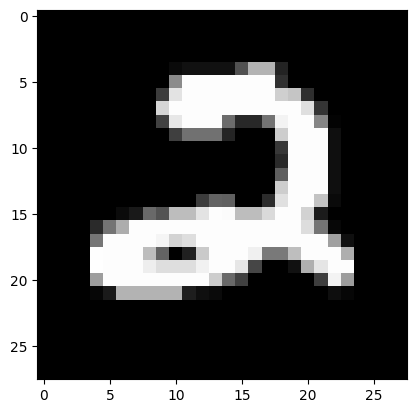

In [31]:
current_image = df_test[0, :, None]
current_image = current_image.reshape((28, 28))
plt.gray()
plt.imshow(current_image, interpolation="nearest")
plt.show()